# Importing Libraries

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Loading the dataset and Processing


In [2]:
loan_data=pd.read_csv("loan_dataset.csv")
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
#statistical measures
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
print(loan_data.isnull().sum())
print("Numbers of row and columns in dataset are:",loan_data.shape)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Numbers of row and columns in dataset are: (614, 13)


Since loan dataset contain missing values, we need to handle this missing values. for this case we are dropping the missing value because there are missing value in categorical features as well.


In [6]:
# dropping the NaN values
loan_data.dropna(inplace=True)
loan_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
loan_data.shape

(480, 13)

In [8]:
#label encoding
loan_data.replace({"Loan_Status":{"N":0,"Y":1}},inplace=True)
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [9]:
loan_data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [10]:
#replacing the value of 3+ to 3 
loan_data.replace(to_replace='3+',value=3,inplace=True)
loan_data['Dependents'].value_counts()

0    274
2     85
1     80
3     41
Name: Dependents, dtype: int64

# Data Visualization

<AxesSubplot: xlabel='Education', ylabel='count'>

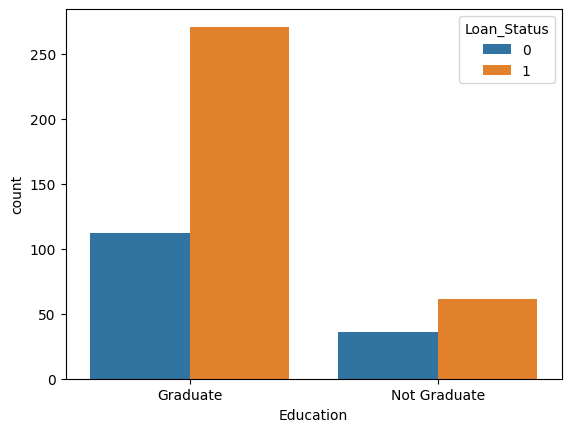

In [11]:
# education and loan status
sns.countplot(data=loan_data,x='Education',hue='Loan_Status')

<AxesSubplot: xlabel='Self_Employed', ylabel='count'>

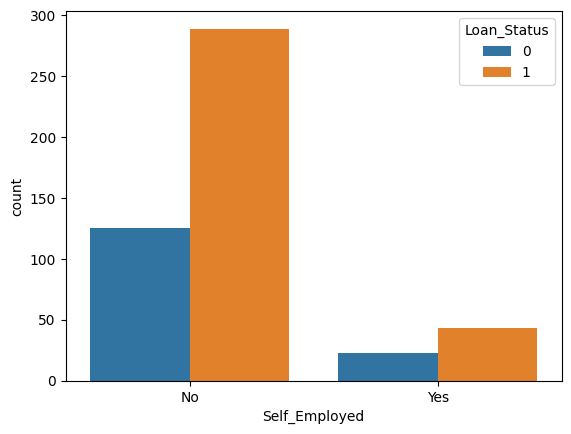

In [12]:
sns.countplot(data=loan_data,x='Self_Employed',hue='Loan_Status')

In [13]:
loan_data['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [14]:
#Label Encoding
loan_data.replace({'Married':{'Yes':1,'No':0},'Gender':{'Male':1,'Female':0},'Self_Employed':{'Yes':1,'No':0},
                'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


C:\Users\USER\AppData\Local\Temp\ipykernel_8560\255938650.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=loan_data.corr()


<AxesSubplot: >

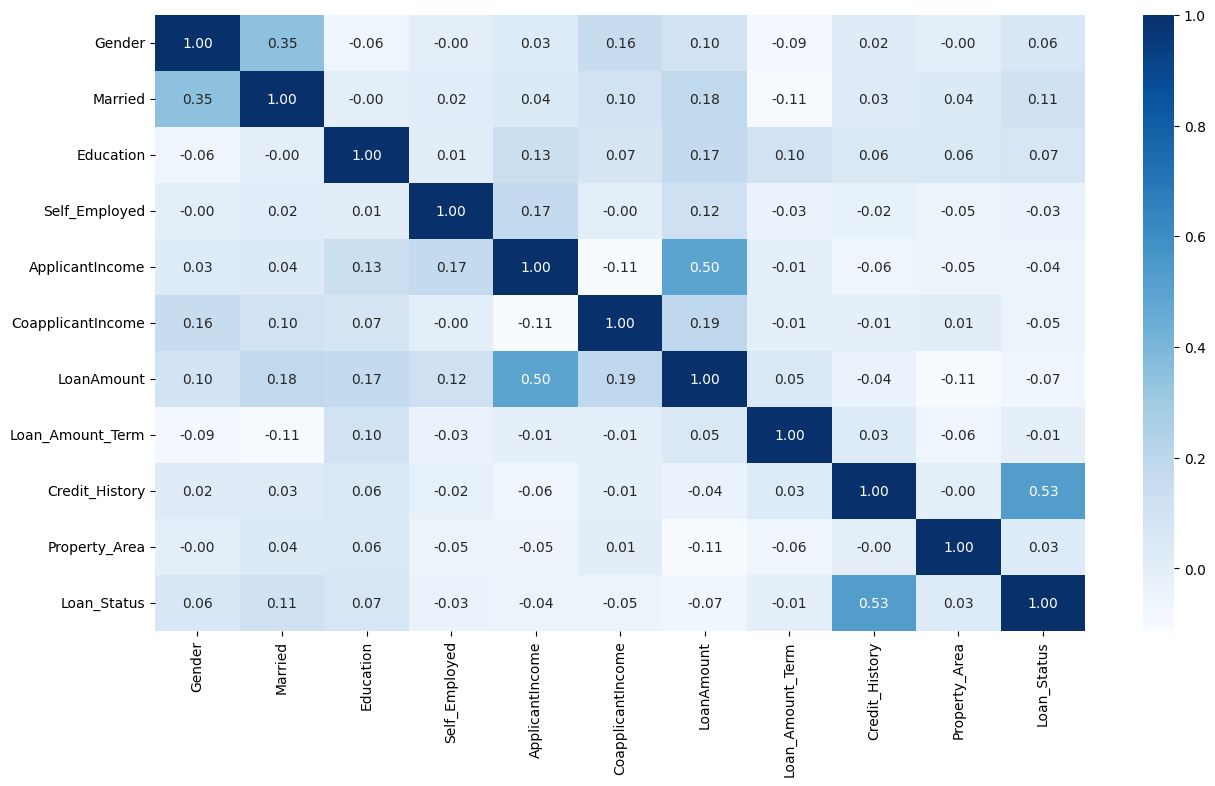

In [45]:
loan_data.drop(columns='Loan_ID',inplace=True)
plt.figure(figsize=(15,8))
corr=loan_data.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,cmap='Blues',annot=True,fmt='.2f')

We can see that 'Loan Status' has moderate positive relation with 'credit history'

# Extracting the features and traget data

In [15]:
x=loan_data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=loan_data['Loan_Status']
print(f'Features:\n{x}\nTarget:\n{y}')

Features:
     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          3          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term 

In [16]:
y.value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

# Spliting into train and test data


In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.1,random_state=2)
print(f'Shape of\nProcessed Data: {x.shape}\nTraining Data: {x_train.shape}\nTest Data:{x_test.shape}')

Shape of
Processed Data: (480, 11)
Training Data: (432, 11)
Test Data:(48, 11)


# Training the model: SVM

In [18]:
classifier=svm.SVC(kernel='linear')

In [19]:
#training the SVM model
classifier.fit(x_train,y_train)

SVC(kernel='linear')

# Model Evaulation


In [20]:
#accuracy score for training data
x_train_prediction=classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [21]:
#accuracy score for test data
x_test_prediction=classifier.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [22]:
print(f"Accuracy Score on:\nTraining Data: {training_data_accuracy}\nTest Data:{test_data_accuracy}")

Accuracy Score on:
Training Data: 0.7685185185185185
Test Data:0.8541666666666666


# Building a Predictive System

In [42]:
print("Required data for prediction are:")
for columns in x.columns:
    print('-->',columns)

Required data for prediction are:
--> Gender
--> Married
--> Dependents
--> Education
--> Self_Employed
--> ApplicantIncome
--> CoapplicantIncome
--> LoanAmount
--> Loan_Amount_Term
--> Credit_History
--> Property_Area


In [43]:
input_data=(1,1,1,1,0,4583,1508,128,360,1,0)

#change the input data to a numpy array
input_data_as_numpy_array=np.asanyarray(input_data)
# print(input_data_as_numpy_array)

#reshape the numpy array as we are predicting for only one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
# print(input_data_reshaped)

prediction=classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print("Loan is rejected")
else:
    print("Loan is Accepted")

[1]
Loan is Accepted


C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Saving the model in pickle file

In [46]:
import pickle

In [50]:
pickle.dump(classifier,open("Loan_Application_Model.pkl",'wb'))